# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    #print data.shape
    #print data.head(5)
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
display(data.head(5))

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


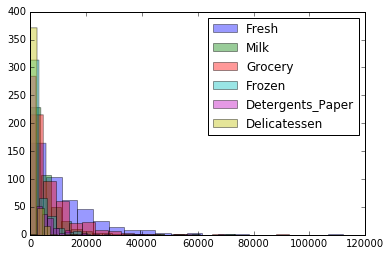

In [3]:
# added lines, to see the data distribution 
import matplotlib.pylab as plt

for item in data.columns:
    plt.hist(data[item], bins=20, label = item, alpha = 0.4)
    plt.legend(loc='best')


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [94,170,424] #np.random.choice(data.shape[0], 3)
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5626,12220,11323,206,5038,244
1,260,8675,13430,1116,7015,323
2,16980,2884,12232,874,3213,249


/Users/JundongQiao/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
94,37.5,90.0,77.7,7.3,81.6,14.1
170,4.1,81.8,82.5,40.0,89.1,19.9
424,75.5,42.4,80.5,31.1,70.2,14.8


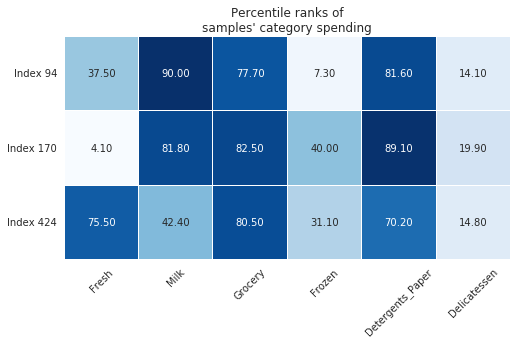

In [5]:
# added lines, to see the places of spendings of the selected samples 
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
display(pcts)

fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)
# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=0.1,fmt='.2f', cmap='Blues', square=True, cbar=False, mask=False, ax=ax1)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The sample 1's cost on the categories of Grocery and Detergents_Paper are above the 75% of the all customers. The corresponding cost on Milk is between 50% and 75%. The cost on Fresh is between 25% and 50%, and the cost on Frozon and Delicatessen are below 25%. I would guess that this sample may represent a grocery store.

The sample 2's cost on the categories of Milk, Grocery and Detergents_Paper are above the 75% of the all customers. The cost on Fresh and Delicatessen are below 25%. The cost on Frozen is between 25 and 50%. I would guess this sample may represent a grocery store as well.

The sample 3's cost on the categories of Fresh and Grocery are above the 75% of the all customers. The cost on Milk and Frozen are between 25% and 50%. The cost on Detergents_Paper is between 50% and 75%. The cost on Delicatessen is below 25%. I would guess this sample may represent market.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'],test_size=0.25, random_state=666)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
regressor = tree.DecisionTreeRegressor(max_depth=3)
regressor = regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = np.round(regressor.score(X_test, y_test), 2)
print score

0.8


/Users/JundongQiao/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attemptted to predict the feature 'Grocery'. The reported prediction score is aroud 0.8, which indidates that 'Grocery' is largely determined by a certain combination of other features. Therefore, this feature may be a redundant one, so it is no necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

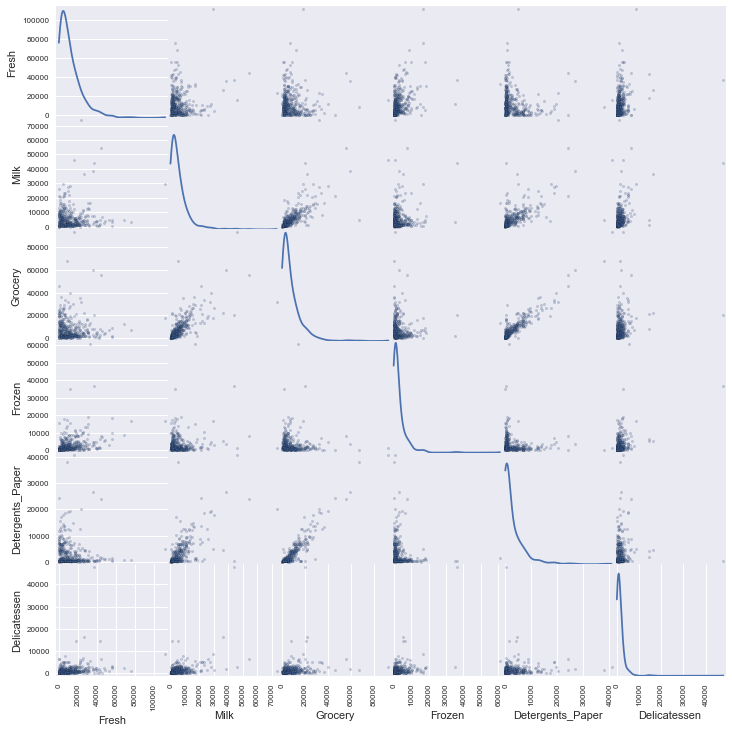

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (12,12), diagonal = 'kde');


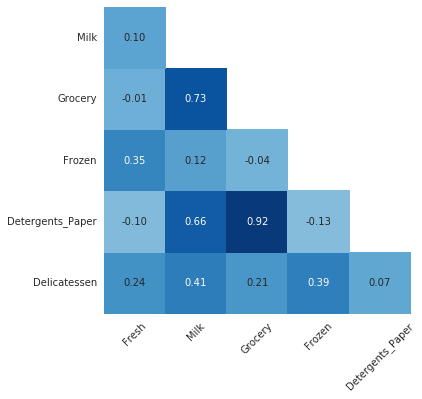

In [8]:
# added lines, to calculated the correlations between features
# get the feature correlations
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f', square=True, cbar=False)
    plt.xticks(rotation=45, ha='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The Grocery and Detergents_Paper exhibit a strong correlation. Also, the Grocery and Milk exhibit somewhat correlation. This confirms my suspision about the feature I attempted to predict. 

The data in all categoray are skewed to the lower end, which looks like a log-normal distribution.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

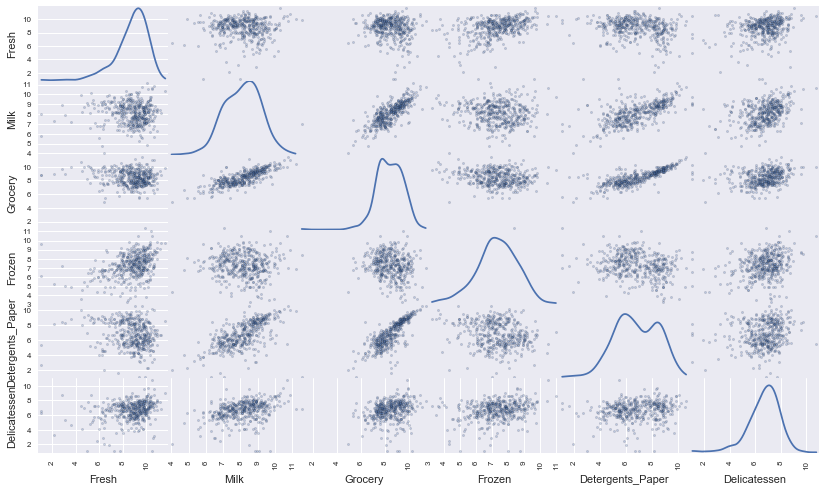

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.635154,9.410829,9.334591,5.327876,8.524764,5.497168
1,5.560682,9.068201,9.505246,7.017506,8.855806,5.777652
2,9.739791,7.966933,9.411811,6.773080,8.074960,5.517453


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
d = log_data.index

In [12]:
# For each feature find the data points with extreme high or low values
idx = {}  # create a dict to store the category and its outliers indices.
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)
    #print Q1
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    #print Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    #print step
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    idx[feature]=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    print idx[feature]
# creating a list to store all the indices of outliers
outliers_list = []
for item in idx.keys():
    outliers_list.append(list(idx[item]))
outliers_list_flat = [item for sublist in outliers_list for item in sublist]

# counting repeated outliers
from collections import Counter
outliers_count = dict(Counter(outliers_list_flat))
# using dict comprehension to return the instances as outliers in more thant one categories.
outliers_mul = dict((key,value) for key, value in outliers_count.iteritems() if value > 1)
print outliers_mul

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = list(set(outliers_list_flat)) # using set to remove the repeated indices

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64')
Data points considered outliers for the feature 'Milk':
Int64Index([86, 98, 154, 356], dtype='int64')
Data points considered outliers for the feature 'Grocery':
Int64Index([75, 154], dtype='int64')
Data points considered outliers for the feature 'Frozen':
Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64')
Data points considered outliers for the feature 'Detergents_Paper':
Int64Index([75, 161], dtype='int64')
Data points considered outliers for the feature 'Delicatessen':
Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64')
{128: 2, 65: 2, 154: 3, 75: 2, 66: 2}


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Sample 65 is considered an outlier in Fresh and Frozon categories. Sample 66 is considered an outlier in Fresh and Delicatessen categories. Sample 75 is considered as an outlier in Grocery and Detergents_Paper categories. Sample 128 is considered as an outlier in both Fresh and Delicatessen categories. Sample 154 is considered outlier in Milk, Grocery and Delicatessen categories. These data points should be removed from the dataset.

I droped the data that occured once in any of the catetories. For doing that, I can keep the data in a shape of matrix witout missing data. It is convineant to conduct the following data exploration.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

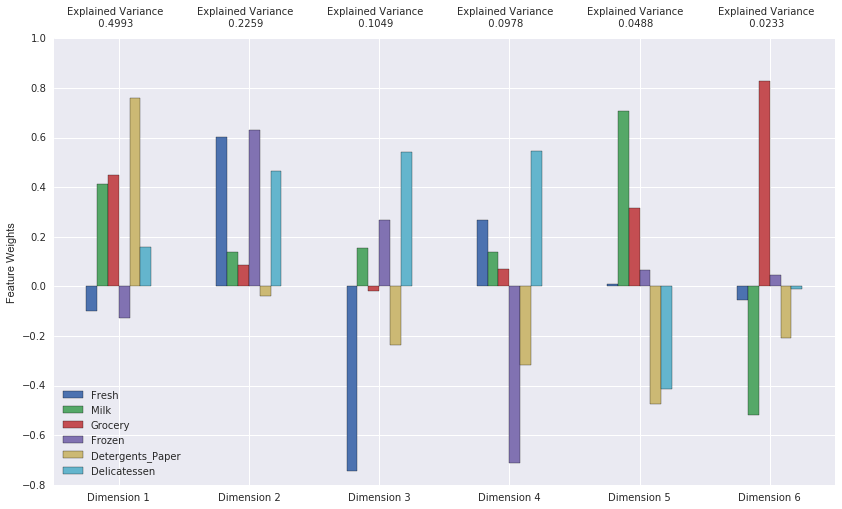

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(good_data.shape[1])
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

About 72.52% of the variance in the data is explained in total by the first and second principal component. About 92.79% of the variance is explained by the first four principal components. 

Based on the plot above, the first principal component is strongly coorelated to Milk, Grocery and Detergents_Paper. The first component increases with the increasing of spending on Milk, Grocery and Detergents_Paper. This indicates that these three categories vary in the same direction, when the spending on Milk increases, so do the Grocery and Detergents_Paper. The covariation can be supported by the above scatter matrix of log-transformed features. Moreover, the first principal component is most strongly coorlated to the spending on the Detergents_Paper, which suggests that the first dimension is a measure of the spending on Detergents_Paper.

The sencond principal component is strongly coorelated with Fresh, Frozen and Delicatessen, which indiates that the spendings on these three categories covary together. This dimension is a measure the spending on Fresh, Frozen and Delicatessen.

The third principal component is strongly negatively coorelated with Milk, but positively correlated with Delicatessen. This indicates that the customers that spent a lof of money on Delicatessen spent less money on Fresh.

The fourth principal component is strongly negatively coorelated with Frozen, but positively coorelated with Delicatessen. This negative coorelation indiates that customers that spent a lof of money on Delicatessen spent less money on Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.3548,-1.9180,-1.2733,0.4031,0.7748,-0.3424
1,2.6704,-2.6155,1.4868,-1.6088,0.3924,0.1510
2,1.1652,-0.5088,-1.8185,-0.3731,0.0906,0.5705


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

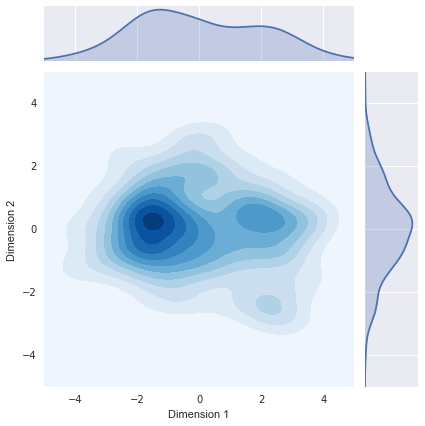

In [16]:
# added lines, to see the potential clusters
g = sns.JointGrid("Dimension 1","Dimension 2",reduced_data,xlim=(-5,5),ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.3548,-1.9180
1,2.6704,-2.6155
2,1.1652,-0.5088


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The advanges of K-Means clustering algorithm:

1) K-means algorithm is simple and cheap to run, especially while the dataset size is huge, and the dimension is high.

2) K-means will produces centroids for all clusters, which make the intepretation easy.

The advantages of Gaussian Mixture Model (GMM) algorithm:

1) GMM tries to fit the data, which maximizes the likelihood. This makes GMM not to bias to a specific internal structure of the data.

2) GMM is for soft clustering, which means that if the hidden clusters overlaps to some extent, GMM can give the probablities of which cluster each data point belongs to.

Given the wholesale customer data in this case, I prefer K-Means algorithm, for the following reasons:

1) The goal is find the hidden customer segments by clustering the data attributes. Usually, customer segments have clear boundaries, so K-Means can produce the expected answers.

2) K-Means runs fast, even with 6 attributes before dimension reduction.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
clusterer = KMeans(n_clusters=2, random_state=666).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print score

0.447157742293


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
2 clusters have the best silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

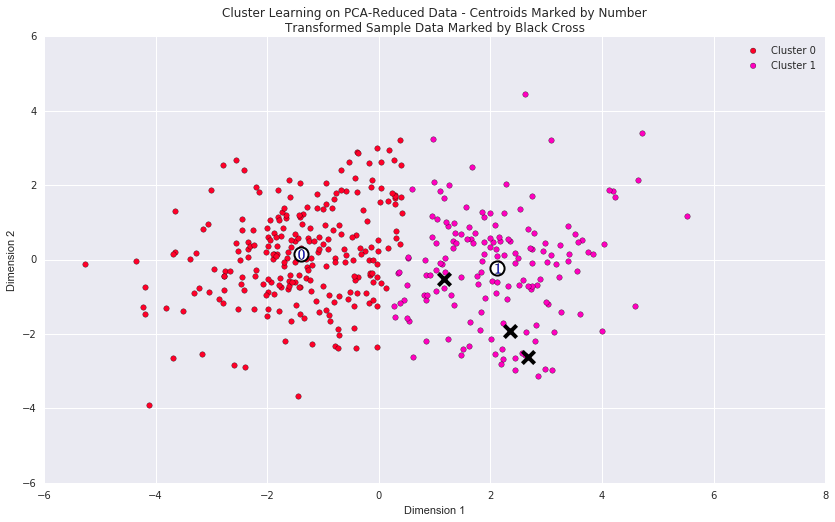

In [19]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
#print log_centers
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


In [21]:
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0
Segment 1,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0
Segment 1,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 

The cluster center of segment 0 is higher than the median of all dataset in Fresh and Frozen, thus the segment 0 may represent cafes or restaurants. The cluster center of segment 1 is higher than mean and median of all dataset in Milk, Grocery and Detergents_Paper, therefore segment 1 may represent markets.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [23]:
display(samples - data.mean().round())
display(samples - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6374.0,6424.0,3372.0,-2866.0,2157.0,-1281.0
1,-11740.0,2879.0,5479.0,-1956.0,4134.0,-1202.0
2,4980.0,-2912.0,4281.0,-2198.0,332.0,-1276.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2878.0,8593.0,6567.0,-1320.0,4222.0,-722.0
1,-8244.0,5048.0,8674.0,-410.0,6199.0,-643.0
2,8476.0,-743.0,7476.0,-652.0,2397.0,-717.0


**Answer:**

The first two samples are higher than median and average of the dataset in Milk, Grocery and Detergents_Paper, which corresponds to the customer spendings of segment 1. As for the third sample, its spending in Grocery, and Detergents_Paper are are higher than median and average of the dataset, which reflects the customer spendings of segment 1. Although the spending in Milk of the third sample is different from the segment 1, the other two spendings make it closer to the segment 1 other than segment 0. Therefore, all the three sample points I chose all belong to segment 1, which is consistent with the prediction.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Based on the given data, 2 customer segments are found. Since customers from different customer segments would behave/response differently to the change of service, the A/B tests should be applied on each customer segment separately. Assuming that the change affects the customers equally in the same customer segment, for example, the wholesale distributor can divide the customer segment 1 into Group A and Group B, the delivery sevice for Group A stay the same, and the sevice for Group B changes to 3 days a week. The overall satisfications of Group A and Group B can help the wholsesale distributor to decide whether the change of delivery service should be made. The wholesale distributor can do the same for customer segment 2, to make final decision on delivery service change.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Based on the unlabeled data, customer segments are found by investigating the hidden structure of the data attributes. After that, the customer labels can be assigned to all customers according to where they belong in the clusters. Now the data are label data: a set of customers characterized with known attributes (spending habits), labeled as various customer segment labels. With the label data, a supervised leaner such as SVM, Decision tree or Neural Network can be employed to train a classifier. After training, the classifer can be used to classify new customer based on the estimates of annual spending of each product category. The target variable would be lables of customer segments.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

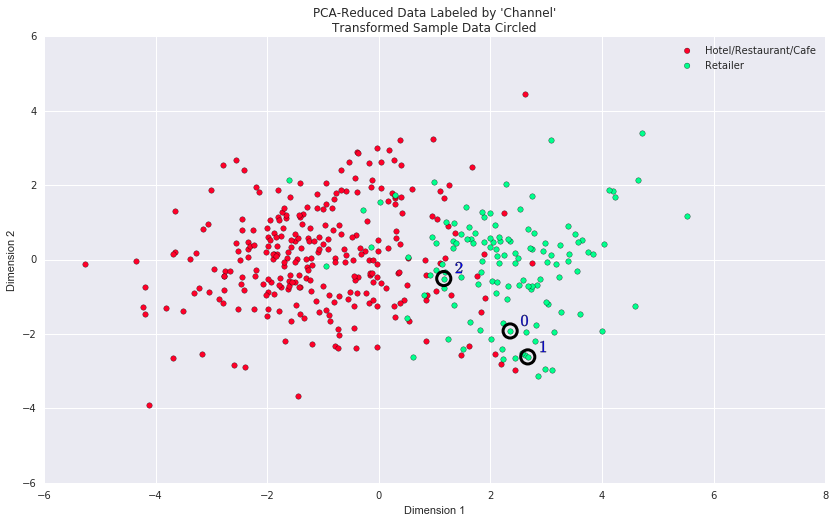

In [24]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The chosen K-Means clustering algorithm with 2 clusters works well on this dataset, comparing to the underlying customer distribution. Most of the customers can be classified as purely 'Retailers' or 'Hotel/Restaurants/Cafes' by the unerlying distribution. Compared to the clustering results, there are Retailers' customers that were classified as 'Hotel/Restaurants/Cafes', vice versa. The misclassification may be paritialy due to the information loss during the feature dimension reduction. Overall, the underlying classifications are consistent with my previous finding of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.